## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
detail_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
detail_results_df
#detail_results_df.set_index('Mouse ID')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
detail_results_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
detail_results_df.loc[detail_results_df.duplicated(['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Set index to mouse ID
detail_results_df = detail_results_df.set_index("Mouse ID")
detail_results_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicated mouse by removing the index which was set to it's ID above
cleaned_df=detail_results_df.drop(["g989"])
cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [11]:
# Reset index
cleaned_df=cleaned_df.reset_index()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
clean_mean = np.mean(cleaned_df["Tumor Volume (mm3)"])
print(f"Mean Tumor Volume is: {clean_mean}")
clean_median = np.median(cleaned_df["Tumor Volume (mm3)"])
print(f"Median Tumor Volume is: {clean_median}")
clean_variance = np.var(cleaned_df["Tumor Volume (mm3)"], ddof=8)
print(f"The variance of the Tumor Volume is: {clean_variance}")
clean_sd = np.std(cleaned_df["Tumor Volume (mm3)"], ddof=0)
print(f"The Standard Deviation of the Tumor Volume is: {clean_sd}")

# Standard Error of Measurement
print(f"Roughly 68% of the tumors are between {round(clean_mean-clean_sd,3)} (mm3) and {round(clean_mean+clean_sd,3)} (mm3).")
print(f"Roughly 95% of the tumors are between {round(clean_mean-2*clean_sd,3)} (mm3) and {round(clean_mean+2*clean_sd,3)} (mm3).")
print(f"Roughly 99.7% of the tumors are between {round(clean_mean-3*clean_sd,3)} (mm3) and {round(clean_mean+3*clean_sd,3)} (mm3).")

Mean Tumor Volume is: 50.435293232255326
Median Tumor Volume is: 48.933453655
The variance of the Tumor Volume is: 79.7600440846857
The Standard Deviation of the Tumor Volume is: 8.911825830982792
Roughly 68% of the tumors are between 41.523 (mm3) and 59.347 (mm3).
Roughly 95% of the tumors are between 32.612 (mm3) and 68.259 (mm3).
Roughly 99.7% of the tumors are between 23.7 (mm3) and 77.171 (mm3).


In [61]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
    #Create new DF of grouped
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
by_regimen_df=cleaned_df.groupby(["Drug Regimen"])
# the mess up is below, how to ask it for mean of the drug regimens inside of the groupby 
grouped_mean = np.mean(by_regimen_df["Tumor Volume (mm3)"])
grouped_median = np.median(by_regimen_df["Tumor Volume (mm3)"])
#grouped_mean


#This part works but no median in np.array so I still need to figure out whats wrong with my groupby syntax
# numPy array for tumor volume
#tumor_vol = cleaned_df[["Tumor Volume (mm3)"]].values
# NumPy array for drug regimen
#drugs= cleaned_df[["Drug Regimen"]].values
# make an array of all drug names
#all_drugs=cleaned_df["Drug Regimen"].unique()

#use list comprehension and go through each drug and compute properties of tumor volume by slicing 
#drug_means=[(i, tumor_vol[drugs==i].mean()) for i in all_drugs]
#drug_median=[(i, tumor_vol[drugs==i].median()) for i in all_drugs]
#drug_var=[(i, tumor_vol[drugs==i].var()) for i in all_drugs]
#drug_std=[(i, tumor_vol[drugs==i].std()) for i in all_drugs]
#grouped_mean

#drug_regimen_summary=pd.DataFrame({ "Mean": grouped_mean})
#drug

TypeError: mean() got an unexpected keyword argument 'axis'

In [62]:
drug_regimen_summary=pd.DataFrame[{"Mean": grouped_mean}]
drug_regimen_summary

TypeError: 'type' object is not subscriptable

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#grouped_single = df.groupby('Team').agg({'Age': ['mean', 'min', 'max']})
agg_results=cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": [np.mean, np.median,np.var, np.std ]})
#"68% Lower"= "Drug Regimen"[mean]-"Drug Regimen"[std]
agg_results

Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  4.994774
Ceftamin              52.591172  51.776157  39.290177  6.268188
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.320930  50.446266  43.852013  6.622085
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.236507  51.818479  48.533355  6.966589

## Bar and Pie Charts

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#reset index since it was set above
by_regimen_df=by_regimen_df.reset_index()
#Call the two Series
time_reg=by_regimen_df[["Drug Regimen", "Timepoint"]]
#set X axis by setting index
time_reg=time_reg.set_index("Drug Regimen")
time_reg

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


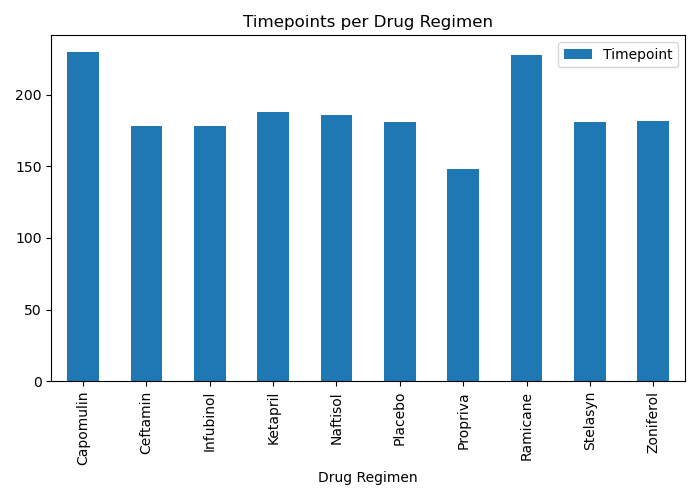

In [44]:
# Configure plot and ticks, assign title and format
time_reg.plot(kind="bar", figsize=(7,5))
plt.title("Timepoints per Drug Regimen")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


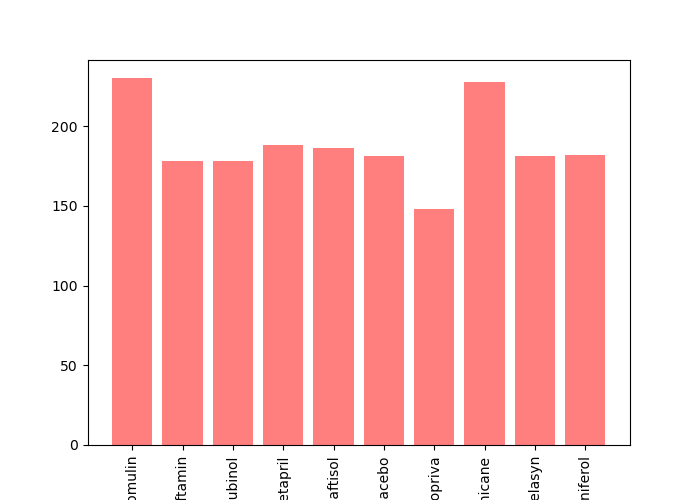

([<matplotlib.axis.XTick at 0x7f8298248b90>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(grouped_df))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,5))
plt.bar(x_axis, by_regimen_df["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, by_regimen_df["Drug Regimen"], rotation="vertical")


In [ ]:
# Set a Title and labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
reduced_df= by_regimen_df.loc[(by_regimen_df["Drug Regimen"] = Capomulin) 
                              or (by_regimen_df["Drug Regimen"]="Ramicane") 
                              or (by_regimen_df["Drug Regimen"]="Infubinol") 
                                  or (by_regimen_df["Drug Regimen"]="Ceftamin")]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


SyntaxError: invalid syntax (508534413.py, line 5)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
